# 1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

Deep Learning is a part of Machine Learning that uses neural networks with many layers (called deep neural networks) to learn patterns from large amounts of data.

It works similar to how the human brain processes information.

- **Evolution of Deep Learning**

    - 1950s–60s: Idea of artificial neurons (Perceptron).
    - 1980s–90s: Neural networks developed but limited due to low computing power.
    - 2006 onwards: Rise of Deep Learning due to:
        - Large datasets (Big Data)
        - Powerful GPUs
        - Better algorithms (Backpropagation, ReLU, Adam)
    - Today: Used in image recognition, speech recognition, self-driving cars, and chatbots.

- **Difference Between traditional ML and Deep ML** :

| Feature            | Traditional Machine Learning | Deep Learning        |
| ------------------ | ---------------------------- | -------------------- |
| Feature extraction | Manual                       | Automatic            |
| Data requirement   | Small to medium              | Very large           |
| Model complexity   | Simple models                | Deep neural networks |
| Computing power    | Low                          | High (GPU needed)    |
| Examples           | Linear Regression, SVM       | CNN, RNN, DNN        |


# 2. Explain the basic architecture and functioning of a Perceptron. What are its limitations? 

A **Perceptron** is the simplest form of a neural network used for binary classification.

**Architecture:**
- Input layer (x₁, x₂, ..., xₙ)
- Weights and bias
- Activation function (step function)

**Functioning:**
The perceptron calculates the weighted sum of inputs, adds a bias, and applies an activation function to produce the final output.

\[
z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
\]

**Limitations:**
- Works only with linearly separable data
- Cannot solve non-linear problems like XOR
- Has no hidden layers
- Not suitable for complex datasets

# 3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.


An **activation function** decides whether a neuron should be activated or not.  
It introduces **non-linearity** in the neural network, which helps the model learn complex patterns.

---

**Comparison of Activation Functions:**

| Activation Function | Formula | Range | Advantages | Disadvantages |
|--------------------|--------|-------|------------|---------------|
| **Sigmoid** | 1 / (1 + e⁻ˣ) | 0 to 1 | Smooth, used in binary classification | Vanishing gradient problem |
| **ReLU** | max(0, x) | 0 to ∞ | Fast, simple, reduces vanishing gradient | Neurons can die for negative values |
| **Tanh** | (eˣ − e⁻ˣ) / (eˣ + e⁻ˣ) | -1 to 1 | Zero-centered output | Still suffers from vanishing gradient |

---

**Summary:**
- Sigmoid is used in output layers for binary classification  
- ReLU is most commonly used in hidden layers  
- Tanh performs better than Sigmoid but slower than ReLU

# 4. What is the difference between Loss function and Cost function in neural networks? Provide examples.


A **Loss Function** measures the error for **one single training example**, while a **Cost Function** measures the **average loss over the entire dataset**.


**Loss Function:**
- Calculates error for one data point
- Used during backpropagation

**Examples:**
- Mean Squared Error (MSE)
- Binary Cross-Entropy


**Cost Function:**
- Average of all loss values
- Represents overall model performance

**Examples:**
- Mean Squared Error over dataset
- Categorical Cross-Entropy


**Difference Summary:**

| Loss Function | Cost Function |
|--------------|--------------|
| For one data sample | For entire dataset |
| Used per iteration | Used to evaluate model |

# 5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

An **optimizer** updates the weights of a neural network to minimize the loss function and improve model accuracy.


**Role of Optimizers:**
- Reduce loss
- Adjust learning rate
- Speed up training
- Improve convergence


**Comparison of Optimizers:**

| Optimizer | Working | Advantages | Disadvantages |
|---------|---------|------------|---------------|
| **Gradient Descent** | Uses full dataset to update weights | Simple and stable | Slow for large data |
| **RMSprop** | Uses moving average of squared gradients | Faster, handles varying learning rates | Needs tuning |
| **Adam** | Combines RMSprop + momentum | Fast and efficient | Uses more memory |


# 6. Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.


In [1]:
import numpy as np

# AND gate inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 10

# Training perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = 1 if linear_output >= 0 else 0
        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Testing
print("Final Weights:", weights)
print("Final Bias:", bias)

print("\nAND Gate Predictions:")
for i in X:
    output = 1 if np.dot(i, weights) + bias >= 0 else 0
    print(f"{i} -> {output}")


Final Weights: [0.2 0.1]
Final Bias: -0.20000000000000004

AND Gate Predictions:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


# 7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.


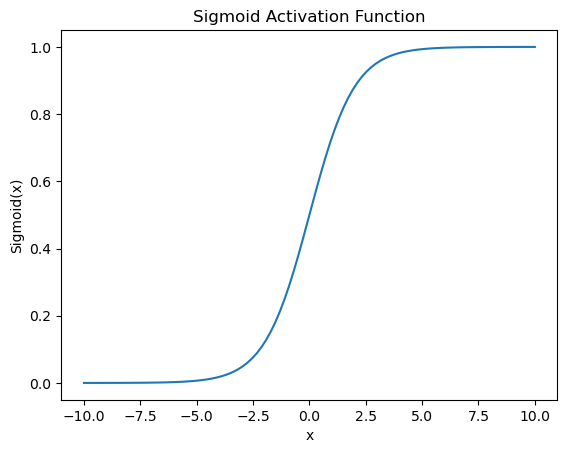

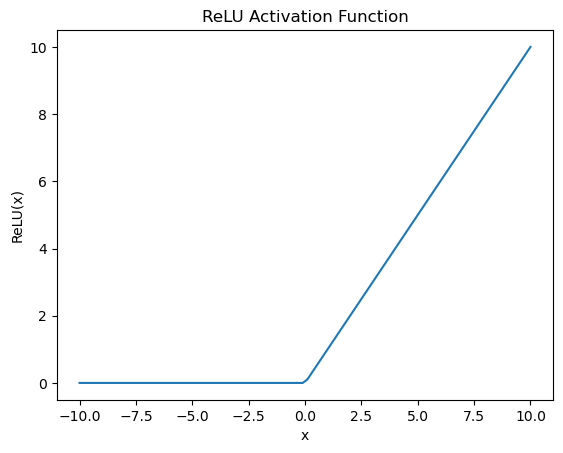

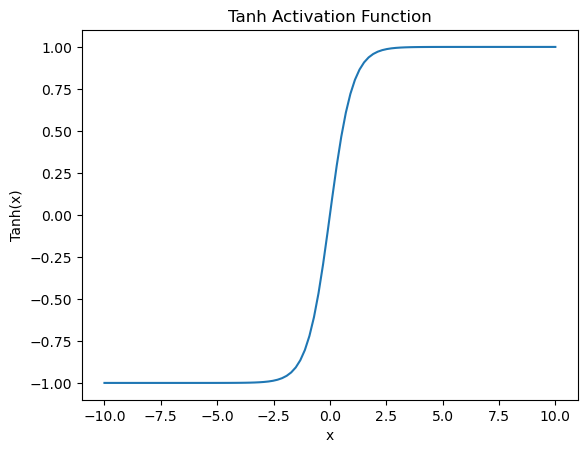

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input values
x = np.linspace(-10, 10, 100)

# Activation functions
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

# Plot Sigmoid
plt.figure()
plt.plot(x, sigmoid)
plt.title("Sigmoid Activation Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.show()

# Plot ReLU
plt.figure()
plt.plot(x, relu)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.show()

# Plot Tanh
plt.figure()
plt.plot(x, tanh)
plt.title("Tanh Activation Function")
plt.xlabel("x")
plt.ylabel("Tanh(x)")
plt.show()


# 8. Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.


In [ ]:
%pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

# Print training accuracy
print("Training Accuracy:", history.history['accuracy'][-1])


c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 43s 4us/step


c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9265 - loss: 0.2575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9657 - loss: 0.1164
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9766 - loss: 0.0785
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9822 - loss: 0.0589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9859 - loss: 0.0442
Training Accuracy: 0.9859499931335449


# 9. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 34s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 36s 8us/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8164 - loss: 0.5220 - val_accuracy: 0.8423 - val_loss: 0.4387
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8606 - loss: 0.3882 - val_accuracy: 0.8633 - val_loss: 0.3850
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8714 - loss: 0.3503 - val_accuracy: 0.8696 - val_loss: 0.3626
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8794 - loss: 0.3255 - val_accuracy: 0.8647 - val_loss: 0.3785
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8883 - loss: 0.3050 - val_accuracy: 0.8742 - val_loss: 0.3453


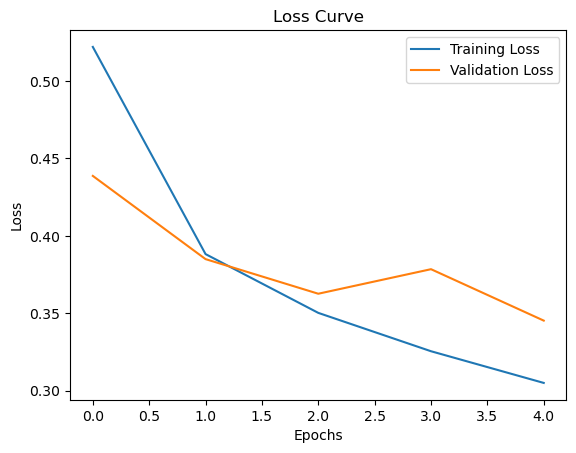

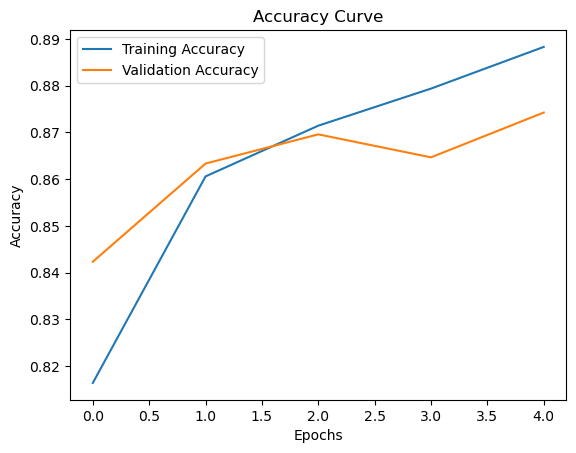

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Plot Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 10. Fraud Detection – Real-Time Deep Learning Workflow


We are solving a **binary classification** problem where transactions are labeled as **fraudulent (1)** or **legitimate (0)**.  
The dataset is **large and imbalanced**, so model design and evaluation are important.


### 1. Model Design
- Use a **Multilayer Neural Network (MLP)**  
- Input layer → transaction features  
- Hidden layers → learn complex patterns  
- Output layer → probability of fraud  

A single perceptron is not enough because the data is **non-linear**.


### 2. Activation & Loss Function
- **Hidden layers:** ReLU (fast and avoids vanishing gradient)
- **Output layer:** Sigmoid (binary classification)
- **Loss function:** Binary Cross-Entropy  
  - Best for binary classification problems

### 3. Training & Evaluation (Imbalanced Data)
- Use **class weights** to handle imbalance  
- Split data into train and test sets  
- Evaluate using:
  - Precision
  - Recall
  - F1-score (more important than accuracy)


### 4. Optimizer & Overfitting Prevention
- **Optimizer:** Adam (fast and adaptive)
- **Prevent overfitting by:**
  - Dropout layers
  - Early stopping
  - Regularization
  - Proper validation split



In [8]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Dummy dataset (for demo)
num_features = 10
X_train = np.random.rand(1000, num_features)
y_train = np.random.randint(0, 2, 1000)

# Handle class imbalance (example)
class_weights = {0: 1, 1: 3}

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=10, class_weight=class_weights)


Epoch 1/10


c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5120 - loss: 1.2191
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5120 - loss: 1.1320
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5120 - loss: 1.1254
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5120 - loss: 1.1341
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5120 - loss: 1.1295
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5120 - loss: 1.1233
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5120 - loss: 1.1308
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5120 - loss: 1.1223
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5120 - loss: 1.1202
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5120 - loss: 1.1168
